In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.src.layers import LSTM, Dropout, Dense
from keras import Sequential
from keras.src.callbacks import EarlyStopping

In [ ]:
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
aapl_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716057,72.776583,71.466797,71.721004,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403625,73.706256,71.943736,71.943736,132079200


In [ ]:
print(aapl_data.isnull().sum())
aapl_data.ffill(inplace=True)

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1, 1))
aapl_data_scaled

array([[0.12820357],
       [0.12324181],
       [0.12726905],
       ...,
       [0.96539516],
       [0.96839535],
       [0.96106967]])

In [ ]:
X = []
y = []
for i in range(60, len(aapl_data_scaled)):
  X.append(aapl_data_scaled[i - 60 : i, 0])
  y.append(aapl_data_scaled[i, 0])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2)) gu
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(1))nia
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 150)        │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, callbacks= [monitor], verbose=1, epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.1676 - val_loss: 0.0039
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0164 - val_loss: 0.0075
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0094 - val_loss: 0.0027
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

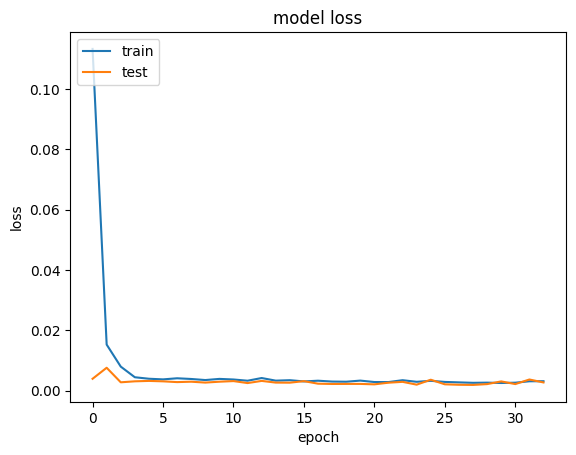

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0092
Test Loss:  0.010584325529634953


In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Mean Absolute Error:  0.09320563017529315
Root Mean Square Error:  0.01058432561200311


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


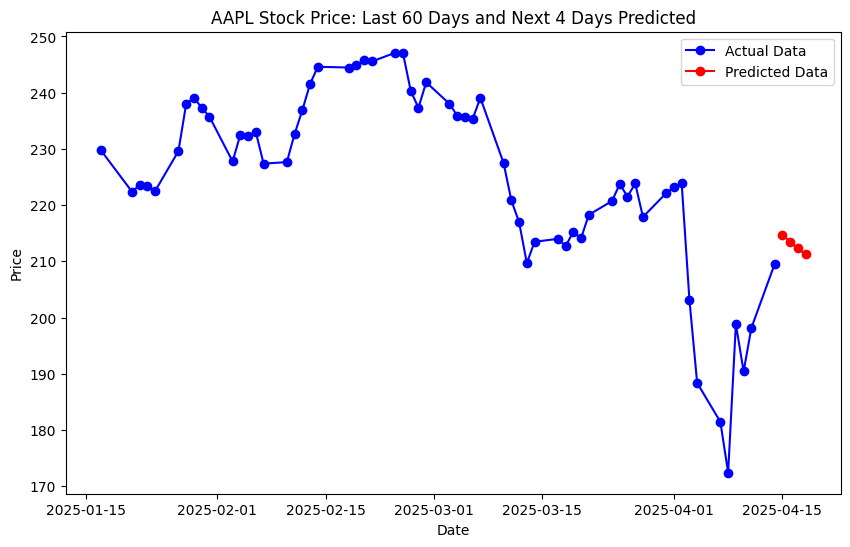

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = yf.download('AAPL', period='64d', interval='1d')
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)
for i in range(4):
  next_prediction = model.predict(current_batch)
  next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
  current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
  predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)
predicted_data = pd.DataFrame(index=prediction_dates,
data=predicted_prices, columns=['Close'])
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:]
plt.figure(figsize=(10, 6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping

data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')
data.ffill(inplace=True)
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403656  73.706287  71.943766  71.943766  132079200


In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Open'].values.reshape(-1, 1))
aapl_data_scaled

array([[0.11570446],
       [0.11726155],
       [0.1115121 ],
       ...,
       [0.96114857],
       [0.97274061],
       [0.97105448]])

In [ ]:
sequence_length = 30
X = []
y = []

for i in range(sequence_length, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-sequence_length:i, 0])
    y.append(aapl_data_scaled[i, 0])

X = np.array(X)
y = np.array(y)

print("Kształt X:", X.shape)
print("Kształt y:", y.shape)

Kształt X: (976, 30)
Kształt y: (976,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 150)        │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,151 (2.42 MB)

 Trainable params: 633,151 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, callbacks= [monitor], verbose=1, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0992 - val_loss: 0.0205
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0102 - val_loss: 0.0043
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

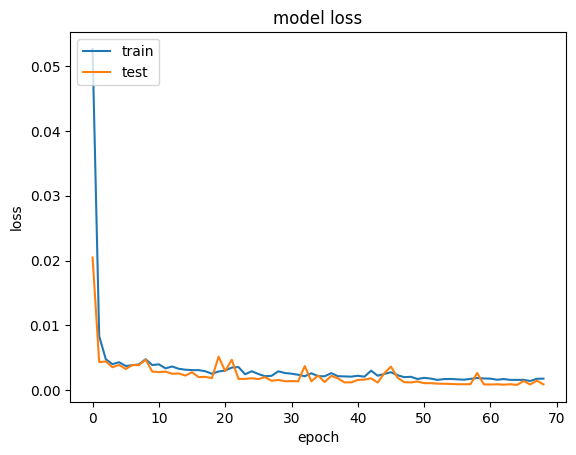

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error: ", rmse)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014     
Test Loss (MSE): 0.001667862175963819
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Absolute Error (MAE): 0.035500581762878555
Mean Squared Error (MSE): 0.001667862240704785
Root Mean Square Error:  0.001667862240704785


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


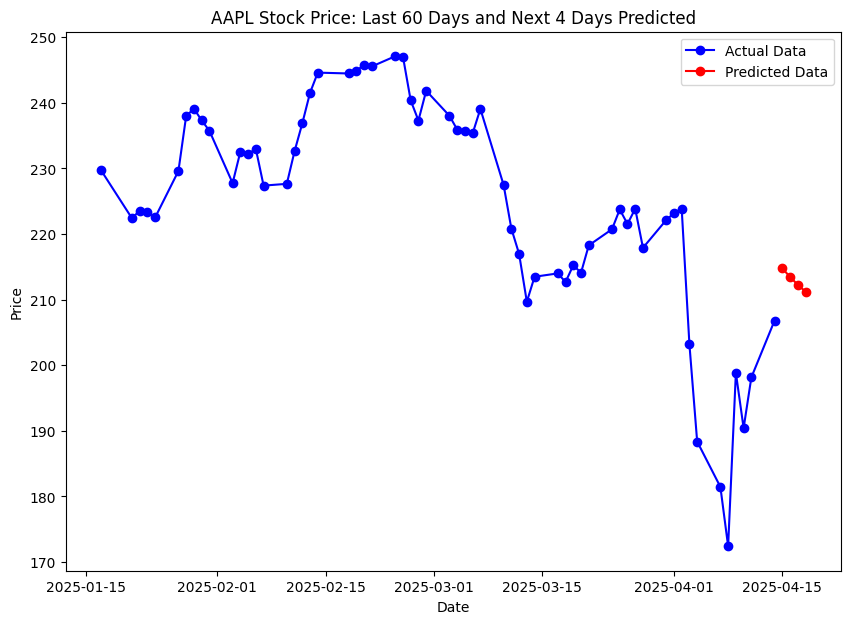

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = yf.download('AAPL', period='64d', interval='1d')
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)
for i in range(4):
  next_prediction = model.predict(current_batch)
  next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
  current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
  predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)
predicted_data = pd.DataFrame(index=prediction_dates,
data=predicted_prices, columns=['Close'])
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-60:]
plt.figure(figsize=(10, 7))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')
plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()